In [1]:
from urllib.request import urlopen
from edfreader import read_edf
from ANEMO import ANEMO
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# Récupération des données

In [2]:
datafile = 'data/enregistrement_AM_2017-10-23_100057.asc'

try:
    data = read_edf(datafile, 'TRIALID')
except:
    url = 'https://github.com/chloepasturel/AnticipatorySPEM/raw/master/data/enregistrement_AM_2017-10-23_100057.asc'
    with open(datafile, 'wb') as f:
        f.write(urlopen(url).read())
    urlopen(url).close()
    f.close()
    data = read_edf(datafile, 'TRIALID')
    
url = 'https://github.com/chloepasturel/AnticipatorySPEM/raw/master/data/enregistrement_AM_2017-10-23_100057.pkl'
exp = pickle.load(urlopen(url), encoding='latin1')
urlopen(url).close()

# plot Fit

In [3]:
trial=1
block=1

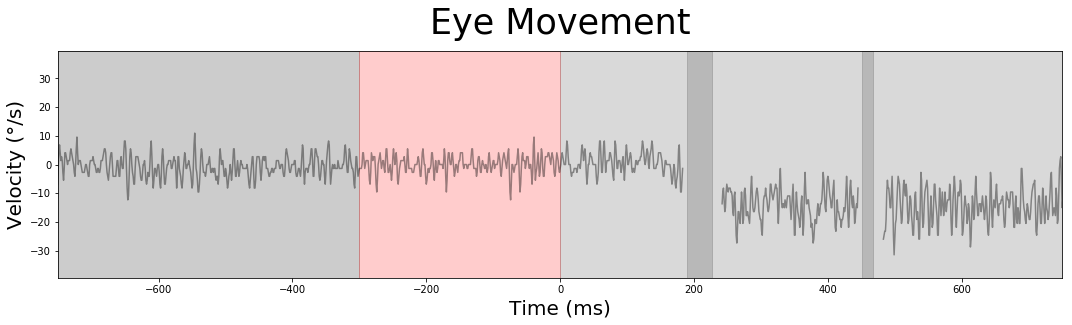

In [4]:
# affiche la vitesse de l'œil pendant l'essai
fig, axs = ANEMO.plot_velocity(data, trial, block, exp['N_trials'], exp['px_per_deg'])

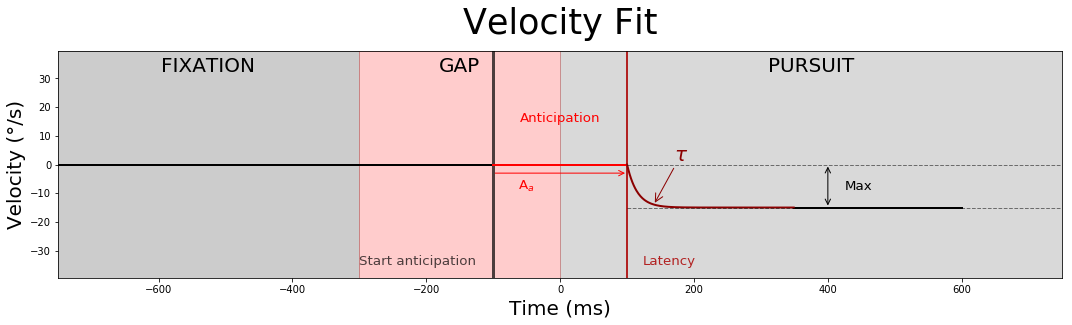

In [5]:
# affiche les paramêtres du Fit
fig, axs = ANEMO.plot_Fit(data, exp['p'][:,:,0], trial, block, exp['N_trials'], exp['px_per_deg'])

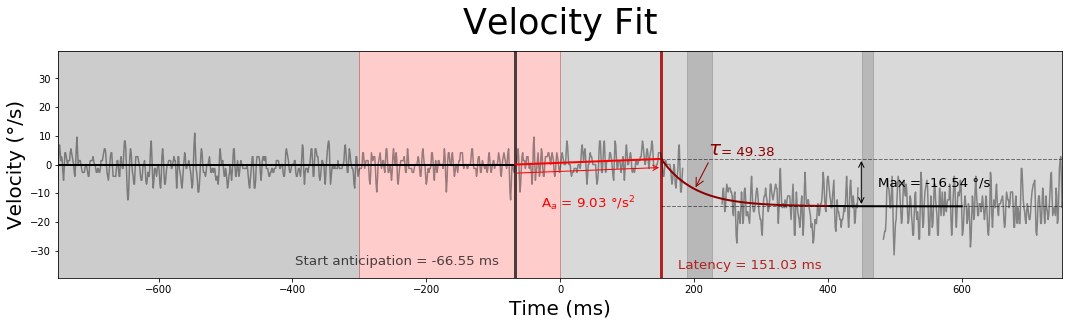

In [6]:
# affiche le Fit de l'essai
fig, axs = ANEMO.plot_Fit(data, exp['p'][:,:,0], trial, block, exp['N_trials'], exp['px_per_deg'], plot='Fitvelocity')

# Enregistrement figure

In [7]:
with open('result/param_Fit_AM.pkl', 'rb') as fichier :
    param = pickle.load(fichier, encoding='latin1')

In [8]:
param.keys()

dict_keys(['fit', 'maxi', 'tau', 'moyenne', 'latence', 'start_anti', 'v_anti', 'observer'])

In [9]:
print('Observer =', param['observer'],
     '\nVitesse anticipation =', param['v_anti'][block][trial],
     '\nstart anticipation =', param['start_anti'][block][trial],
     '\nlatence visuel =', param['latence'][block][trial],
     '\ntau =', param['tau'][block][trial],
     '\nMax =', param['maxi'][block][trial])

Observer = AM 
Vitesse anticipation = 9.033854777606194 
start anticipation = -66.55345241413693 
latence visuel = 151.0312756565936 
tau = 49.38063568279507 
Max = 16.536063329195144


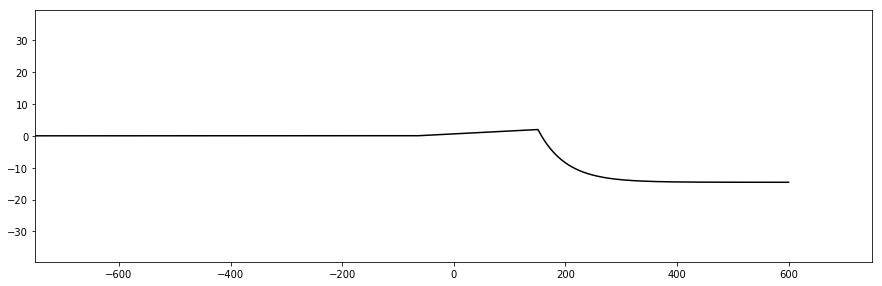

In [10]:
fig_width=15
trial_data = trial + exp['N_trials']*block
trackertime = data[trial_data]['trackertime']
TargetOn = data[trial_data]['events']['msg'][15][0]
start = TargetOn

trackertime_s = trackertime - start
fit = param['fit'][block][trial]


fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width*1/2)/1.6180))
axs.axis([-750, 750, -39.5, 39.5])
axs.plot(trackertime_s[:len(fit)], fit , c='k');